In [1]:
import pandas as pd
df=pd.read_excel("https://github.com/masterfloss/dataRealEstate/raw/main/rendas.xls",header=7).drop([0,1])

In [2]:
import re
def extract_semester_year(text):
    # Use regular expressions to extract semester and year
    match = re.match(r'(\d+)\.º Semestre de (\d+)', text)
    if match:
        semester = int(match.group(1))
        year = int(match.group(2))
        return pd.to_datetime(f"{year}-07-01") + pd.DateOffset(months=(semester - 1) * 6)
    else:
        return None

# Apply the custom function to the DataFrame column
df['Date'] = df['Unnamed: 0'].apply(extract_semester_year)

# Get the list of column names to be dropped
columns_to_drop = [col for col in df.columns if col.startswith('Unnamed: ')]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)
df=df.set_index('Date')

<Axes: xlabel='Date'>

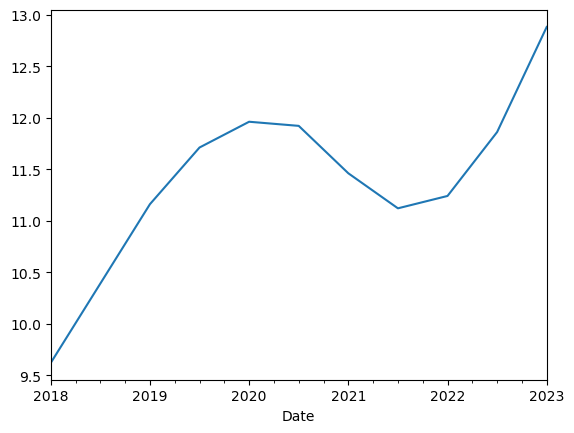

In [3]:


# Print the DataFrame after dropping the columns
df['Lisboa'].plot()

<Axes: xlabel='Date'>

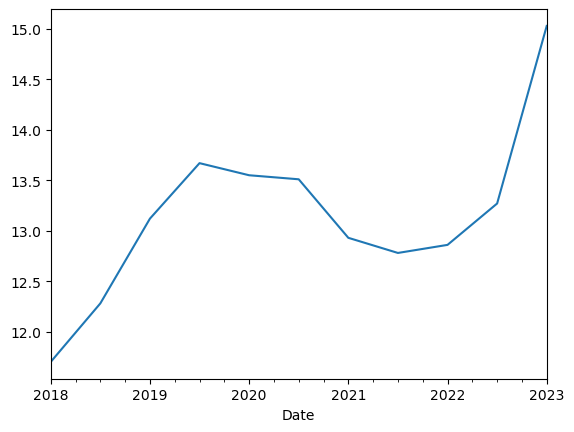

In [4]:
df['Parque das Nações'].plot()

<Axes: xlabel='Date'>

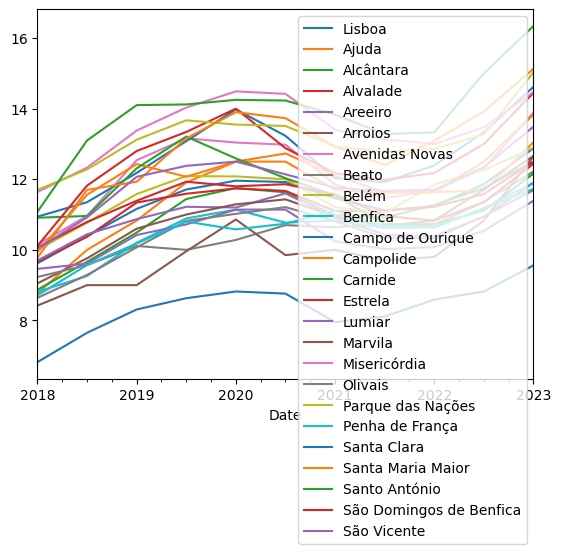

In [5]:
df.plot()